# Main thing for using this repo

## Production of "raw" data

In [1]:

import numpy as np
import pandas as pd
from rawdata_gen import data_gen
from IPython.display import display
import pyarrow.parquet as pq


Te_range = [0.200001, 80.0] # eV
ne_range = [1e18, 1e20] # m^-3
no_range = [1e15, 1e19] # m^-3

pressure_limit = 3e21 # eV * m^-3 -> 2*Te*ne

# NOTE: the number of samples is not the number of samples in the final dataset
# the final dataset will have less samples because of the pressure limit
# this specific Irate and Rrate is 50% to 60% of the total number of samples
# inputed in the beginning
# this scaling of 50% to 60% applies when the number of samples is large
# for small number of samples the scaling is different
# this has to do with the fact, here the LatinHypercube sampling is used
# and there is some randomness in the sampling
# this can be seen in the rawdata_gen.py file at line 80

# the ranges of Te, ne, no can be changes, and also the way to apply limits if shown in line ~80 in the rawdata_gen.py file
# example:
# self.data = self.data[[a and b and c for a, b, c in zip(self.data[:,8] >= Irate_lower_limit, self.data[:,8] <= Irate_upper_limit,\
#  self.data[:,9] >= Rrate_lower_limit)]]
# simply add more a, b, c, d, ... and change the limits for the specific limits. 
# take into account that the index of the category (ex. Irate_lowe_limit) for specifiying the limits. 


num_samples = 5000
num_samples = int(num_samples/0.95) # this 0.6 can be changed.
num_samples = int(61**2) 

data = data_gen(Te_range, ne_range, no_range, pressure_limit, num_samples,\
     Brec3_limit=[0.0, 1.00],\
        Rrate_limit = [1e-12, 1e30], \
            Irate_limit = [1e-12, 1e30] )

df = data.get_data_pd()


display(df)



number of samples before applying pressure limit: 3721
number of samples after applying pressure limit: 3721

 number of samples after applying Irate (rec fraction), Rrate limits: 3721

Output of the c file: 
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3721
 DONE
 c file for He ratios run done. Name of temporary file for data: temp_tene_cfile.csv 
 this file can be ignored or deleted


emi_3-2       emi_4-2       emi_5-2       emi_7-2         Te  \
0     1.044350e+21  1.152298e+20  3.401953e+19  8.604268e+18   3.118431   
1     8.403138e+21  9.735838e+20  1.268552e+20  6.598061e+18  13.337837   
2     1.684342e+20  2.263942e+19  3.605971e+18  1.794480e+17   5.066717   
3     6.055125e+20  2.378828e+20  8.885826e+19  2.358140e+19   0.737938   
4     3.260781e+18  2.285107e+18  1.332828e+18  5.676738e+17   0.275099   
...            ...           ...           ...           ...        ...   
3716  1.965997e+23  2.026291e+22  2.419258e+21  1.357719e+20  28.236000   
3717  2.203202e+21  3.937348e+20  6.715550e+19  4.643575e+18  25.115819   
3718  3.794065e+18  2.698891e+18  1.490152e+18  7.372077e+17   0.213230   
3719  2.586751e+21  7.722982e+20  2.867138e+20  7.750366e+19   0.931105   
3720  3.918746e+19  1.975590e+19  8.582500e+18  2.548180e+18   1.027610   

                ne            no  Ion_degree         Irate         Rrate  \
0     7.690430e+19  3.566690e+17    0.995384  1.180001e+22  1.434769e+21   
1     9.922982e+18  8.190675e+17    0.923751  9.548633e+22  4.779506e+18   
2     5.437284e+18  1.060931e+17    0.980861  9.300442e+20  3.599926e+18   
3     3.816730e+19  1.813833e+18    0.954633  3.699790e+16  3.080032e+21   
4     2.198067e+18  2.112083e+17    0.912335  5.349898e+00  2.630470e+19   
...            ...           ...         ...           ...           ...   
3716  1.685791e+19  8.517475e+18    0.664341  3.548435e+24  6.594159e+18   
3717  2.099132e+18  5.669134e+17    0.787358  2.443164e+22  1.153854e+17   
3718  1.843845e+18  6.177190e+15    0.996661  7.046518e-08  3.043256e+19   
3719  8.534410e+19  8.961622e+18    0.904973  2.042417e+19  1.260791e+22   
3720  1.696706e+19  4.079981e+16    0.997601  3.941143e+16  2.646335e+20   

            CXrate          Pexc          Prec   728/706   728/668  Brec3/B3  \
0     3.155036e+23  4.842192e+04   3581.823194  0.095306  0.106471  0.165817   
1     1.593999e+23  2.156524e+05     24.312281  0.172315  0.192430  0.000031   
2     7.991483e+21  4.228308e+03     11.005710  0.101564  0.270897  0.001567   
3     4.107962e+23  4.036563e+00   6369.260921  0.048110  0.139822  0.999962   
4     1.681766e+21  2.526181e-12     55.729415  0.089283  1.254596  1.000000   
...            ...           ...           ...       ...       ...       ...   
3716  3.779036e+24  5.708433e+06     63.504253  0.333077  0.151501  0.000001   
3717  2.991763e+22  5.028749e+04      0.989073  0.250126  0.389592  0.000002   
3718  3.632496e+19  1.210410e-18     64.382005  0.082763  1.712193  1.000000   
3719  5.101791e+24  7.381934e+02  25802.915549  0.055814  0.100053  0.997982   
3720  4.843723e+21  1.919150e+00    573.621121  0.050929  0.181352  0.999426   

        IrateRrate  
0     1.323478e+22  
1     9.549111e+22  
2     9.336441e+20  
3     3.080069e+21  
4     2.630470e+19  
...            ...  
3716  3.548442e+24  
3717  2.443175e+22  
3718  3.043256e+19  
3719  1.262834e+22  
3720  2.646729e+20  

[3721 rows x 17 columns]

In [6]:
# pressure limit 
50 * 3e19 * 2

3e+21

In [40]:
# inputs
data_folder = 'raw_datasets/dataset_exp_master'
inputs_labels = ['emi_3-2', 'emi_5-2', '728/706', '728/668']
outputs_labels = ['Te', 'ne', 'no', 'Irate', 'Rrate', 'Brec3/B3']

if Path(data_folder + 'TRAIN.parquet').is_file():

    data_set_train = pq.read_table(data_folder + 'TRAIN.parquet').to_pandas()
    data_set_val = pq.read_table(data_folder + 'VAL.parquet').to_pandas()
    data_set_test = pq.read_table(data_folder + 'TEST.parquet').to_pandas()
   
df = data_set_train.copy()


min_Da = df['emi_3-2'].min()
min_Dg = df['emi_5-2'].min()
min_He_706 = df['728/706'].min()
min_He_668= df['728/668'].min()


# get min of each value and print it
min_Te = df['Te'].min()
min_ne = df['ne'].min()
min_no = df['no'].min()
min_Irate = df['Irate'].min()
min_Rrate = df['Rrate'].min()


# inputs
max_Da = df['emi_3-2'].max()
max_Dg = df['emi_5-2'].max()
max_He_706 = df['728/706'].max()
max_He_668= df['728/668'].max()

# get max of each value and print it
max_Te = df['Te'].max()
max_ne = df['ne'].max()
max_no = df['no'].max()
max_Irate = df['Irate'].max()
max_Rrate = df['Rrate'].max()

# print the min and max of each value
print('Da = {:.4E} to {:.4E}'.format(min_Da, max_Da))
print('Dg = {:.4E} to {:.4E}'.format(min_Dg, max_Dg))
print('He_706 = {:.4E} to {:.4E}'.format(min_He_706, max_He_706))
print('He_668 = {:.4E} to {:.4E}'.format(min_He_668, max_He_668))

print('---------')

print('Te = {} to {}'.format(min_Te, max_Te))
print('ne = {:.4E} to {:.4E}'.format(min_ne, max_ne))
print('no = {:.4E} to {:.4E}'.format(min_no, max_no))
print('Irate = {:.4E} to {:.4E}'.format(min_Irate, max_Irate))
print('Rrate = {:.4E} to {:.4E}'.format(min_Rrate, max_Rrate))
# print('IrateRrate = {:.4E} to {:.4E}'.format(min_IrateRrate, max_IrateRrate))


Da = 3.2716E+16 to 5.1139E+23
Dg = 6.5452E+15 to 1.3691E+22
He_706 = 4.0909E-02 to 8.4581E-01
He_668 = 9.4019E-02 to 1.9873E+00
---------
Te = 0.20000122411371973 to 79.99981409036857
ne = 1.0000E+18 to 1.0000E+20
no = 1.0000E+15 to 1.0000E+19
Irate = 1.9073E-10 to 1.6156E+25
Rrate = 7.9410E+15 to 1.8680E+24


/var/folders/_3/3757q02j3rb_45jnmmvqcc700000gn/T/ipykernel_2643/1171129894.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


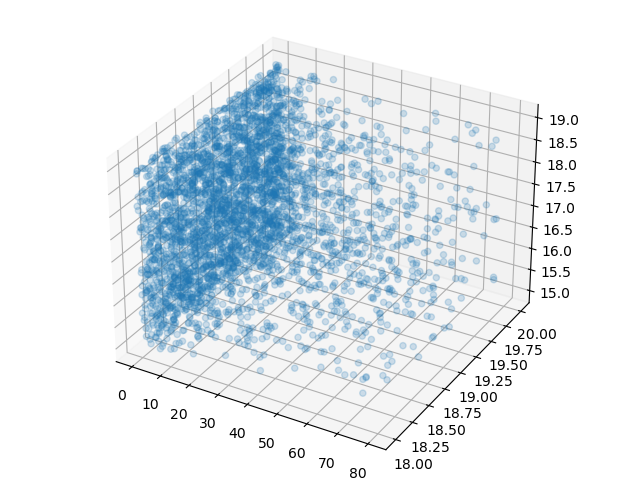

In [3]:
# make 3d scatter of Te, ne, no
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ax = plt.figure().add_subplot(projection='3d')

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df['Te'], np.log10(df['ne']), np.log10(df['no']), alpha=0.2)
# 
plt.show()


(2398352,)
(2398352,)
(2398352,)


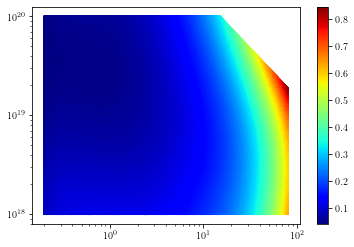

In [19]:
# plot Te vs 728/706
import matplotlib.pyplot as plt
print(df['728/706'].shape)
print(df['Te'].shape)
print(df['ne'].shape)
plt.scatter(df['Te'], df['ne'], c = df['728/706'], cmap='jet', s = 1)

plt.xscale('log')
plt.yscale('log')

plt.colorbar()
plt.show()


Text(0, 0.5, 'He_728/706')

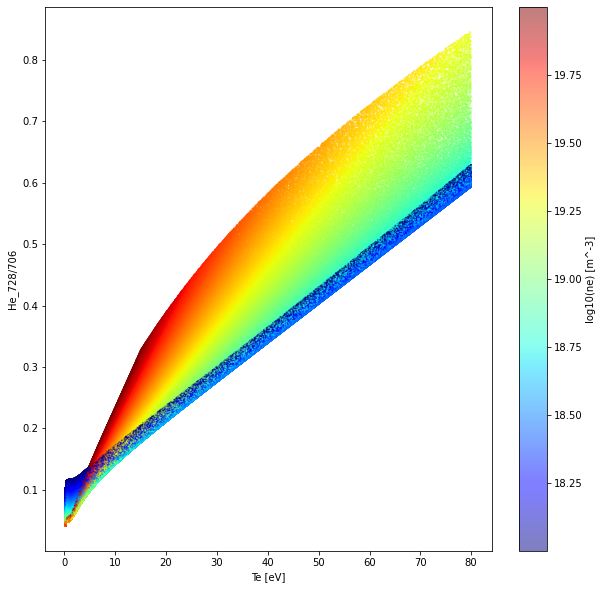

In [23]:
# load dataset saved as parquet file
df = pd.read_parquet('raw_datasets/dataset_exp_master_TRAIN.parquet')
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
plt.scatter(df['Te'], c = df['728/706'], c=np.log10(df['ne']), cmap='jet', s = 0.3, alpha=0.5)
plt.colorbar(label='log10(ne) [m^-3]')
# color bar label
plt.xlabel('Te [eV]')
plt.ylabel('He_728/706')



## Data production 

The data is divided into train, validation and test sets. The way I generated the three different datasets is simply producing three independent datasets, with the amount of data I want to have in each set. Since the LatinHypercube sampling is random, the three datasets are independent. There might be a better way to do this, but this is the way I did it. 

I will include a simple function with inputa bthe percetanges or numbers of samples for each data sets, and it saves to csv of the three datasets. At least for the way I did it, a data set has a name: ex. ``dataset_1``. And the the three datasets are saved as ``dataset_1_TRAIN.csv``, ``dataset_1_VAL.csv``, ``dataset_1_TEST.csv`` in the folder: ``raw_datasets``. 

In [1]:
import numpy as np
import pandas as pd
from rawdata_gen import data_gen
from IPython.display import display
import pyarrow.parquet as pq

dataset_name = 'raw_datasets/dataset_exp_master_3'
part_data = ['num_samples', [80, 10, 10]]
part_data = ['percents', int(2.5e6/0.95), [80, 10, 10]]


Te_range = [0.200001, 80.0] # eV
ne_range = [1e18, 1e20] # m^-3
no_range = [1e15, 1e19] # m^-3
pressure_limit = 3e21 # eV * m^-3 -> 2*Te*ne

Brec3_limit=[0.0, 1.00]
Rrate_limit = [1e-12, 1e30]
Irate_limit = [1e-12, 1e30] 


def train_test_val_save_datasets(dataset_name, part_data, filetype ='parquet'):

    # A proper "error dealing" should be implemented here

    # direcly specify the number of samples for train, test, val
    if part_data[0] == 'num_samples':

        num_samples_train = part_data[1][0]
        num_samples_test = part_data[1][1]
        num_samples_val = part_data[1][2]

    # spcify the total number of samples, and the percentages for train, test, val
    elif part_data[0] == 'percents':

        num_samples_train = int(part_data[1] * part_data[2][0] / 100)
        num_samples_test = int(part_data[1] * part_data[2][1] / 100)
        num_samples_val = int(part_data[1] * part_data[2][2] / 100)

    if filetype == 'parquet':

        ext = '.parquet'

    elif filetype == 'csv':

        ext = '.csv'


    data_train = data_gen(Te_range, ne_range, no_range, pressure_limit, num_samples_train,\
                            Brec3_limit=Brec3_limit,\
                                Rrate_limit = Rrate_limit, \
                                    Irate_limit = Irate_limit )
    data_train.save_data_pd(dataset_name + '_TRAIN' + ext, filetype)

    data_test = data_gen(Te_range, ne_range, no_range, pressure_limit, num_samples_test, \
                            Brec3_limit = Brec3_limit,\
                                Rrate_limit = Rrate_limit, \
                                    Irate_limit = Irate_limit )
    data_test.save_data_pd(dataset_name + '_TEST' + ext, filetype)
    
    data_val = data_gen(Te_range, ne_range, no_range, pressure_limit, num_samples_val,\
                            Brec3_limit = Brec3_limit,\
                                Rrate_limit = Rrate_limit, \
                                    Irate_limit = Irate_limit )
    data_val.save_data_pd(dataset_name + '_VAL' + ext, filetype)
    


# NOTE:
# the number of samples for train, test, val is not the number of samples in the final dataset
# the final dataset will have less samples because of the pressure limit and so forth


# Of course, you can also produce a main dataset, and then split it into train, test, val. 

train_test_val_save_datasets(dataset_name, part_data)

number of samples before applying pressure limit: 2105262
number of samples after applying pressure limit: 2105262

 number of samples after applying Irate (rec fraction), Rrate limits: 2105262

Output of the c file: 
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
80

# Get dataset 

In [24]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
#import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import tensorflow as tf
from keras.regularizers import l2
from tensorflow.keras.layers import Input, Dense, BatchNormalization, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
import pickle
from keras.losses import Huber
import keras.backend as K
import sys
from pathlib import Path
import pyarrow.parquet as pq

data_folder = 'raw_datasets/dataset_exp_master_3_'
inputs_labels = ['emi_3-2', 'emi_5-2', '728/706', '728/668']
outputs_labels = ['Te', 'ne', 'no', 'Irate', 'Rrate', 'Brec3/B3']

if Path(data_folder + 'TRAIN.parquet').is_file():

    data_set_train = pq.read_table(data_folder + 'TRAIN.parquet').to_pandas()
    data_set_val = pq.read_table(data_folder + 'VAL.parquet').to_pandas()
    data_set_test = pq.read_table(data_folder + 'TEST.parquet').to_pandas()
   

    print("----PARQUET FILES FOUND-----")

# assign all inputs to X_full
X_train = data_set_train[inputs_labels].values
X_val = data_set_val[inputs_labels].values
X_test = data_set_test[inputs_labels].values

# assign all outputs to y_full
y_train = data_set_train[outputs_labels].values
y_val = data_set_val[outputs_labels].values
y_test = data_set_test[outputs_labels].values

X = np.vstack((X_train, X_val, X_test))
y = np.vstack((y_train, y_val, y_test))




----PARQUET FILES FOUND-----


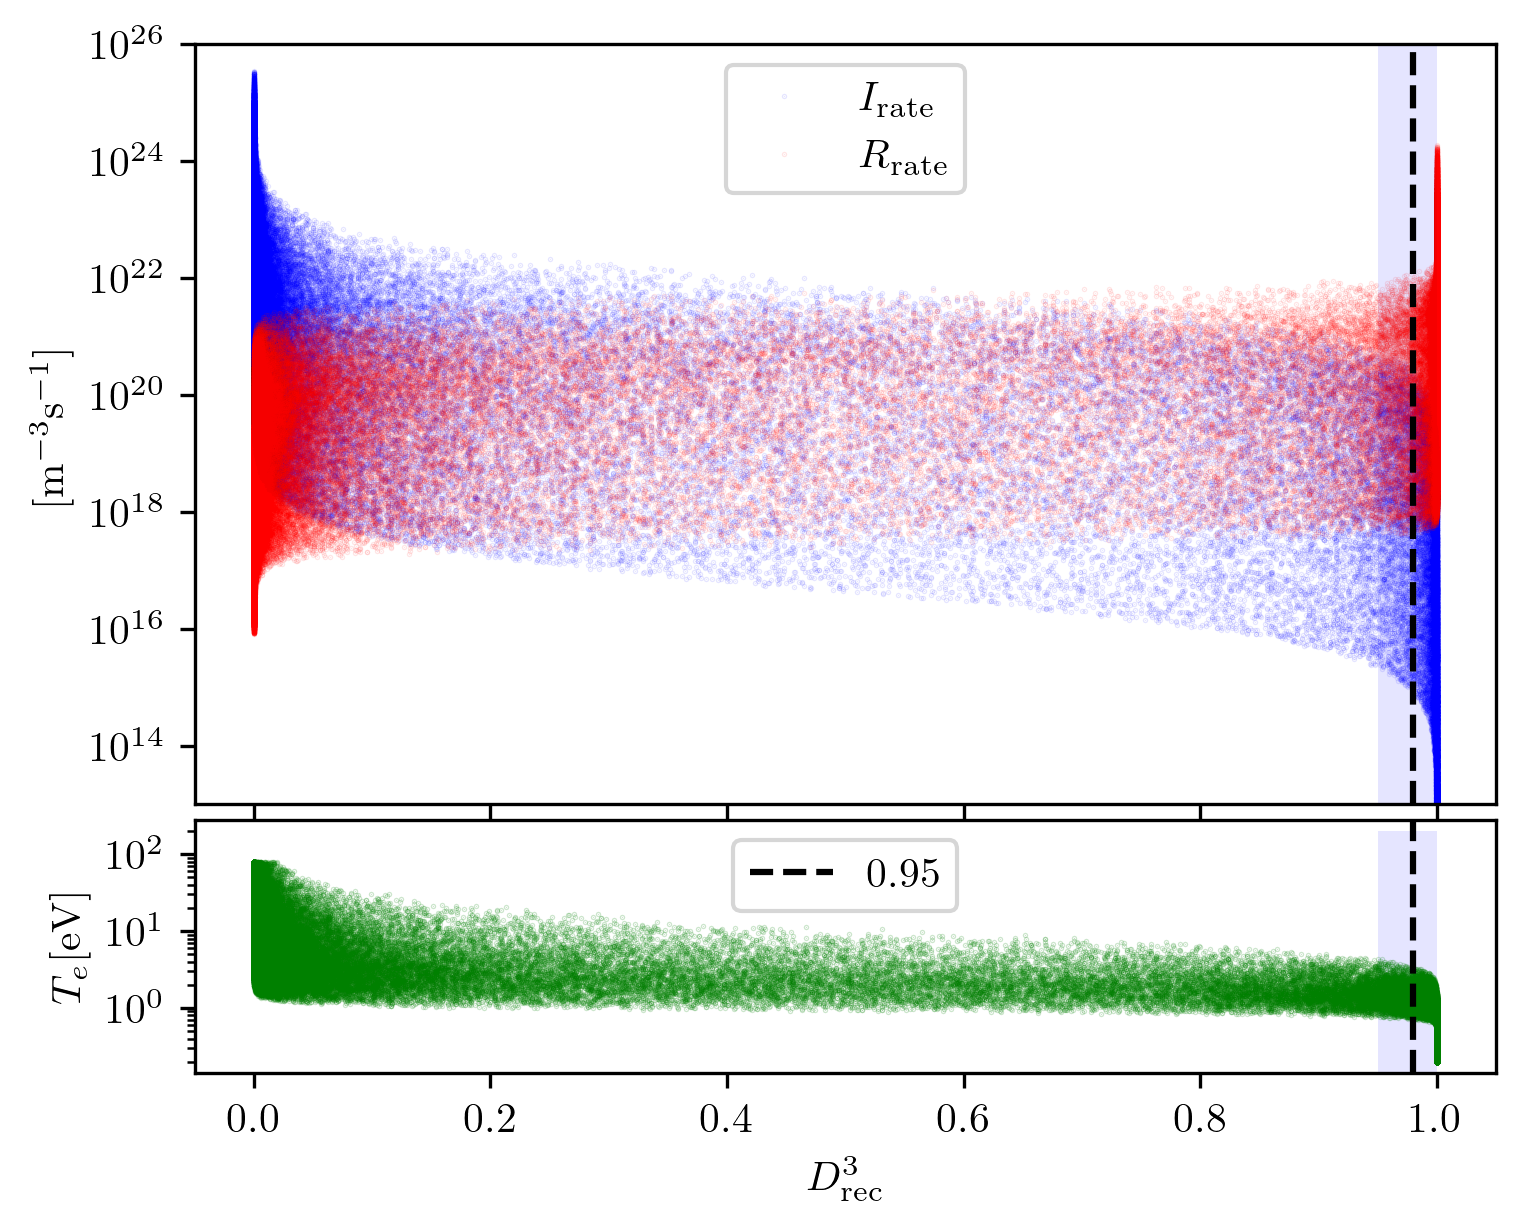

Number of values above 0.98:  61652
Number of values below 0.98:  138348


In [31]:
import matplotlib.pyplot as plt
from   matplotlib  import rc
# make plot latex
rc('font',**{'family':'serif','serif':['Computer Modern Serif'], 'size': 10})
rc('text', usetex=True)


rec3 = y[:200000, 5].copy()
Irate = y[:200000, 3].copy()
Rrate = y[:200000, 4].copy()

Te = y[:200000, 0].copy()

split = 0.98

# fig = plt.figure(figsize=(5, 4), dpi = 300)

fig, axs = plt.subplots(2, 1, figsize=(5, 4), dpi = 300, gridspec_kw={'height_ratios': [3,1]})
fig.tight_layout()

# first plot 

axs[0].plot(rec3, Irate, 'bo', markersize = 0.3, alpha=0.1, label=r'$I_{\rm rate}$')
axs[0].plot(rec3, Rrate, 'ro', markersize = 0.3, alpha=0.1, label=r'$R_{\rm rate}$')
axs[0].set_yscale('log')
axs[0].set_ylim([1e13, 1e26])
axs[0].set_ylabel(r'$[{\rm m^{-3} s^{-1}}]$') 

# plot vertical line 
axs[0].axvline(x=split, color='k', linestyle='--', linewidth=1.5)
#plt.axvline(x=0.02, color='k', linestyle='--', linewidth=0.5)
axs[0].legend()

# axs[0].fill_betweenx(Rrate, 0.95, 1,  facecolor='green', alpha=.5)
square_x = [0.95, 1.0, 1.0, 0.95, 0.95]
square_y = [1e12, 1e12, 1e26, 1e26, 1e12]
axs[0].fill(square_x, square_y, "b", alpha = 0.1)


# second plot

axs[1].plot(rec3, Te, 'go', markersize=0.3, alpha=0.2) #, label='r$T_e$')
axs[1].set_yscale('log')
axs[1].axvline(x=split, color='k', linestyle='--', linewidth=1.5, label = r'$0.95$')
axs[1].set_ylabel(r'$T_e [{\rm eV}]$') 
axs[1].set_xlabel(r'$D^{3}_{\rm rec}$') 
axs[1].legend()

square_x = [0.95, 1.0, 1.0, 0.95, 0.95]
square_y = [0, 0, 2e2, 2e2, 0]
axs[1].fill(square_x, square_y, "b", alpha = 0.1)


#
fig.subplots_adjust(hspace=0.03)
plt.show()

# count the number of values below 0.05 and above 0.95
# print('Number of values below 0.02: ', np.sum(rec3 < 0.02))
print('Number of values above {}: '.format(split), np.sum(rec3 > split))
print('Number of values below {}: '.format(split), np.sum(rec3 <= split))
# count number of values between 0.05 and 0.95
# print('Number of values between 0.02 and {}: '.format(split), np.sum((rec3 > 0.02) & (rec3 < split)))

In [7]:
fig = plt.figure(figsize=(10, 10))

ne = y[:, 1].copy()
Rrate = y[:, 4].copy()
Te = y[:, 0].copy()

plt.scatter(Te, Rrate, c=np.log10(ne) , cmap='jet', s = 0.3, alpha=0.5)
plt.colorbar(label='ne [m^-3]')


#plt.plot(Te, Rrate, 'bo', markersize=0.2, alpha=0.1, label='Irate')

#plt.plot(Te, Irate, 'ro', markersize=0.2, alpha=0.1, label='Irate')

plt.yscale('log')
plt.xscale('log')


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x2e393e310> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'ne [m^-3]'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../24224182754a01df01fdab4f930a18fa.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-02-24>
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2022/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2022/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2022/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2022/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 24224182754a01df01fdab4f930a18fa.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily ne [m^
                      -3]}
No pages of output.
Transcript written on 24224182754a01df01fdab4f930a18fa.log.




RuntimeError: latex was not able to process the following string:
b'ne [m^-3]'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../24224182754a01df01fdab4f930a18fa.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-02-24>
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2022/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2022/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2022/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2022/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 24224182754a01df01fdab4f930a18fa.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily ne [m^
                      -3]}
No pages of output.
Transcript written on 24224182754a01df01fdab4f930a18fa.log.




<Figure size 720x720 with 2 Axes>

Number of values below 0.05:  101532
Number of values above 0.95:  67930


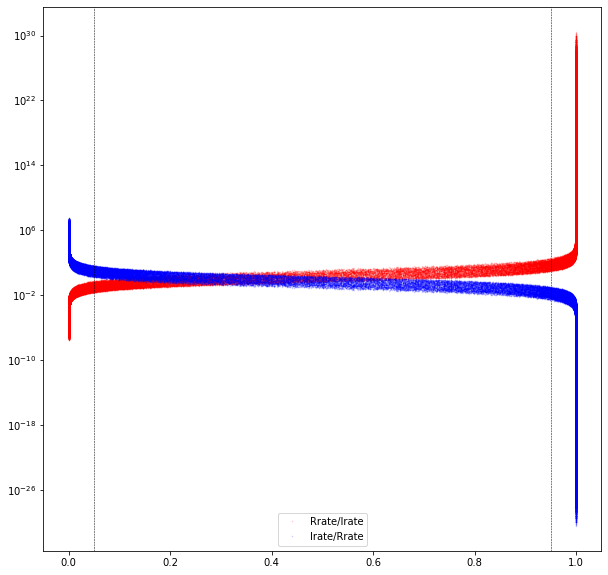

In [113]:
fig = plt.figure(figsize=(10, 10))

ratio_Rrate_Irate = Rrate / Irate

ratio_Irate_Rrate = Irate / Rrate

plt.plot(rec3, ratio_Rrate_Irate, 'ro', markersize=0.5, alpha=0.2, label='Rrate/Irate')
plt.plot(rec3, ratio_Irate_Rrate, 'bo', markersize=0.5, alpha=0.2, label='Irate/Rrate')
plt.axvline(x=0.95, color='k', linestyle='--', linewidth=0.5)
plt.axvline(x=0.05, color='k', linestyle='--', linewidth=0.5)

print('Number of values below 0.05: ', np.sum(rec3 < 0.05))
print('Number of values above 0.95: ', np.sum(rec3 > 0.95))
plt.yscale('log')
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (200000,) and (3157893,)

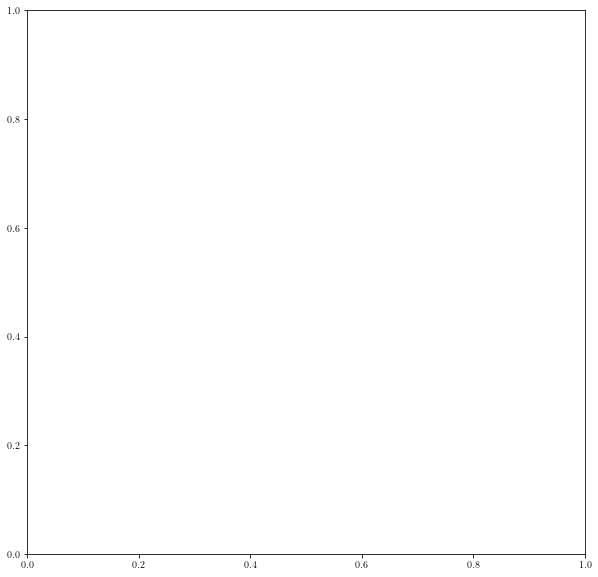

In [10]:
Te = y[:, 0].copy()

fig = plt.figure(figsize=(10, 10))

plt.plot(rec3, Te, 'bo', markersize=0.5, alpha=0.2, label='Te')
plt.axvline(x=0.96, color='k', linestyle='--', linewidth=0.5)
plt.yscale('log')

# Check the disribution of inputs in dataset

In [50]:
import models
model_path = 'models_v2/experiments_8/fancy-wind-12'
model_ensemble = models.BNN_crazy_ensemble_DNN(model_path=model_path)

# load dataset
X_preprocess, y_preprocess = model_ensemble.load_set_pre_process()

X_no_process, y_no_process = model_ensemble.load_test_set()


### config parameters ###
{'batch_size': 20000, 'epochs': 80, 'dataset': 'raw_datasets/dataset_exp_master_', 'inputs_labels': ['emi_3-2', 'emi_5-2', '728/706', '728/668'], 'inputs_prepro': [3, 3, 3, 3], 'inputs_scaler': 'StandardScaler', 'outputs_labels': ['Te', 'ne', 'no', 'Irate', 'Rrate', 'Brec3/B3'], 'outputs_prepro': [3, 3, 3, 3, 3, 1], 'outputs_scaler': 'MinMaxScaler', 'min_max_scale': (0, 10), 'model': 'MLP_BNN_model_Denseflipout_multi_output', 'last_bayes_layer': 100, 'l2_regularizer': 1e-08, 'gau_noise': [0.03, 0.03, 0.03, 0.03], 'num_nodes': 100, 'num_layers': 5, 'optimizer': 'adam', 'activation_fn': 'relu', 'loss_fn': 'mse', 'earlystopping_patience': 4, 'rec3_class': 0.97, 'inputs_mean_params': [10052082.197509686, 3244978.4719866547, 0.5091241580160363, 0.6577705424868243], 'inputs_scale_params': [11488025.276958555, 3168089.0004733037, 0.13198925203623493, 0.15184615433269585], 'outputs_min_params': [0.5848047407502157, 1000000.1276758848, 100000.05679203164, 105996.199912

/Users/jaimecaballero/miniforge3/envs/epfl2/lib/python3.8/site-packages/tensorflow_probability/python/layers/util.py:95: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/Users/jaimecaballero/miniforge3/envs/epfl2/lib/python3.8/site-packages/tensorflow_probability/python/layers/util.py:105: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(


Getting data from folder:  raw_datasets/dataset_exp_master_
----PARQUET FILES FOUND-----
Getting data from folder:  raw_datasets/dataset_exp_master_
----PARQUET FILES FOUND-----


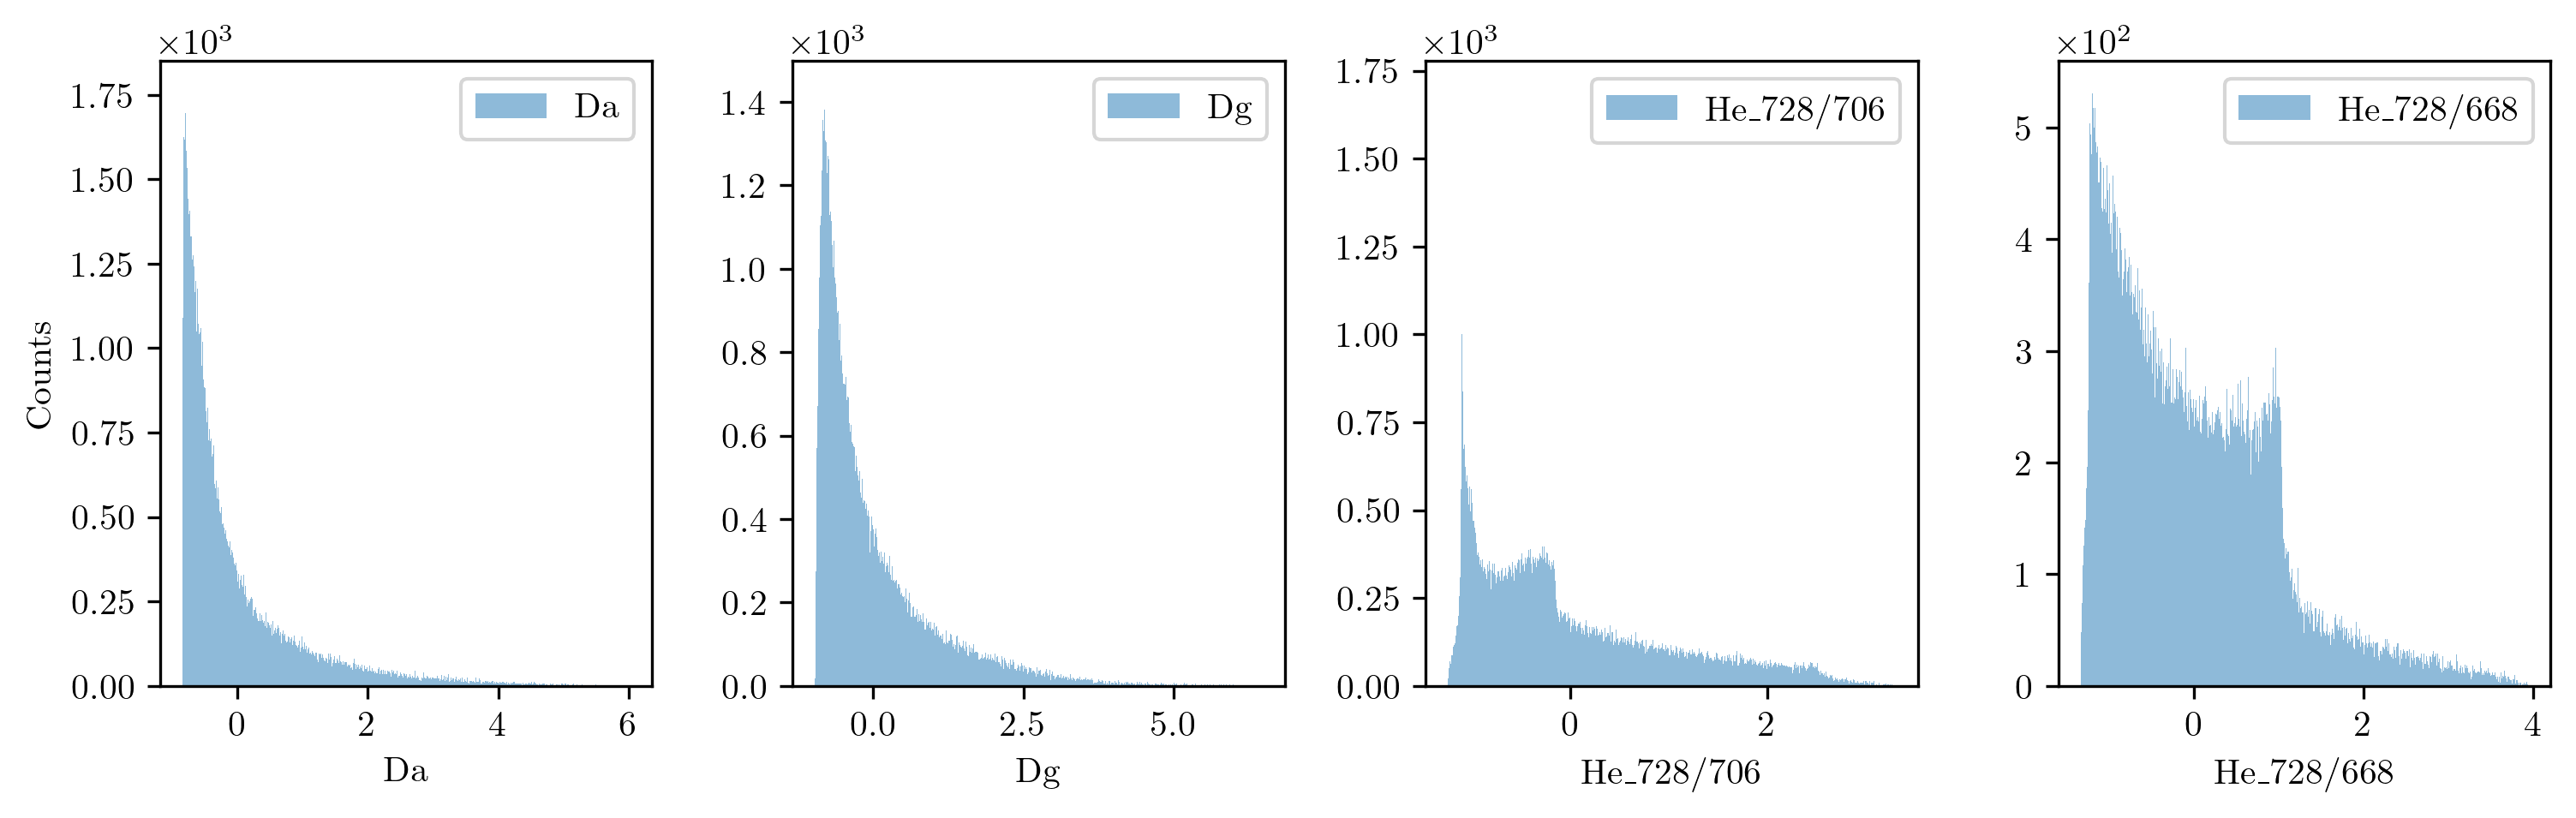

In [54]:
# make histogram of X_test[:, 0]

import matplotlib.pyplot as plt
import numpy as np


# make the histograms of X_preprocess[:, 0], X_preprocess[:, 1], X_preprocess[:, 2], X_preprocess[:, 3]
# make a 4 horizontal subplots

fig, axs = plt.subplots(1, 4, figsize=(10, 3), dpi = 300, gridspec_kw={'height_ratios': [1]})
fig.tight_layout()

# make y axis ticks in scientfic notation
for ax in axs:
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

axs[0].hist(X_preprocess[:, 0], bins=2000, alpha=0.5, label='Da')
axs[0].set_xlabel('Da')
axs[0].set_ylabel('Counts')
axs[0].legend()

axs[1].hist(X_preprocess[:, 1], bins=2000, alpha=0.5, label='Dg')
axs[1].set_xlabel('Dg')
axs[1].legend()

axs[2].hist(X_preprocess[:, 2], bins=2000, alpha=0.5, label='He_728/706')
axs[2].set_xlabel('He_728/706')
axs[2].legend()

axs[3].hist(X_preprocess[:, 3], bins=2000, alpha=0.5, label='He_728/668')
axs[3].set_xlabel('He_728/668')
axs[3].legend()

fig.subplots_adjust(hspace=0.03)
plt.show()






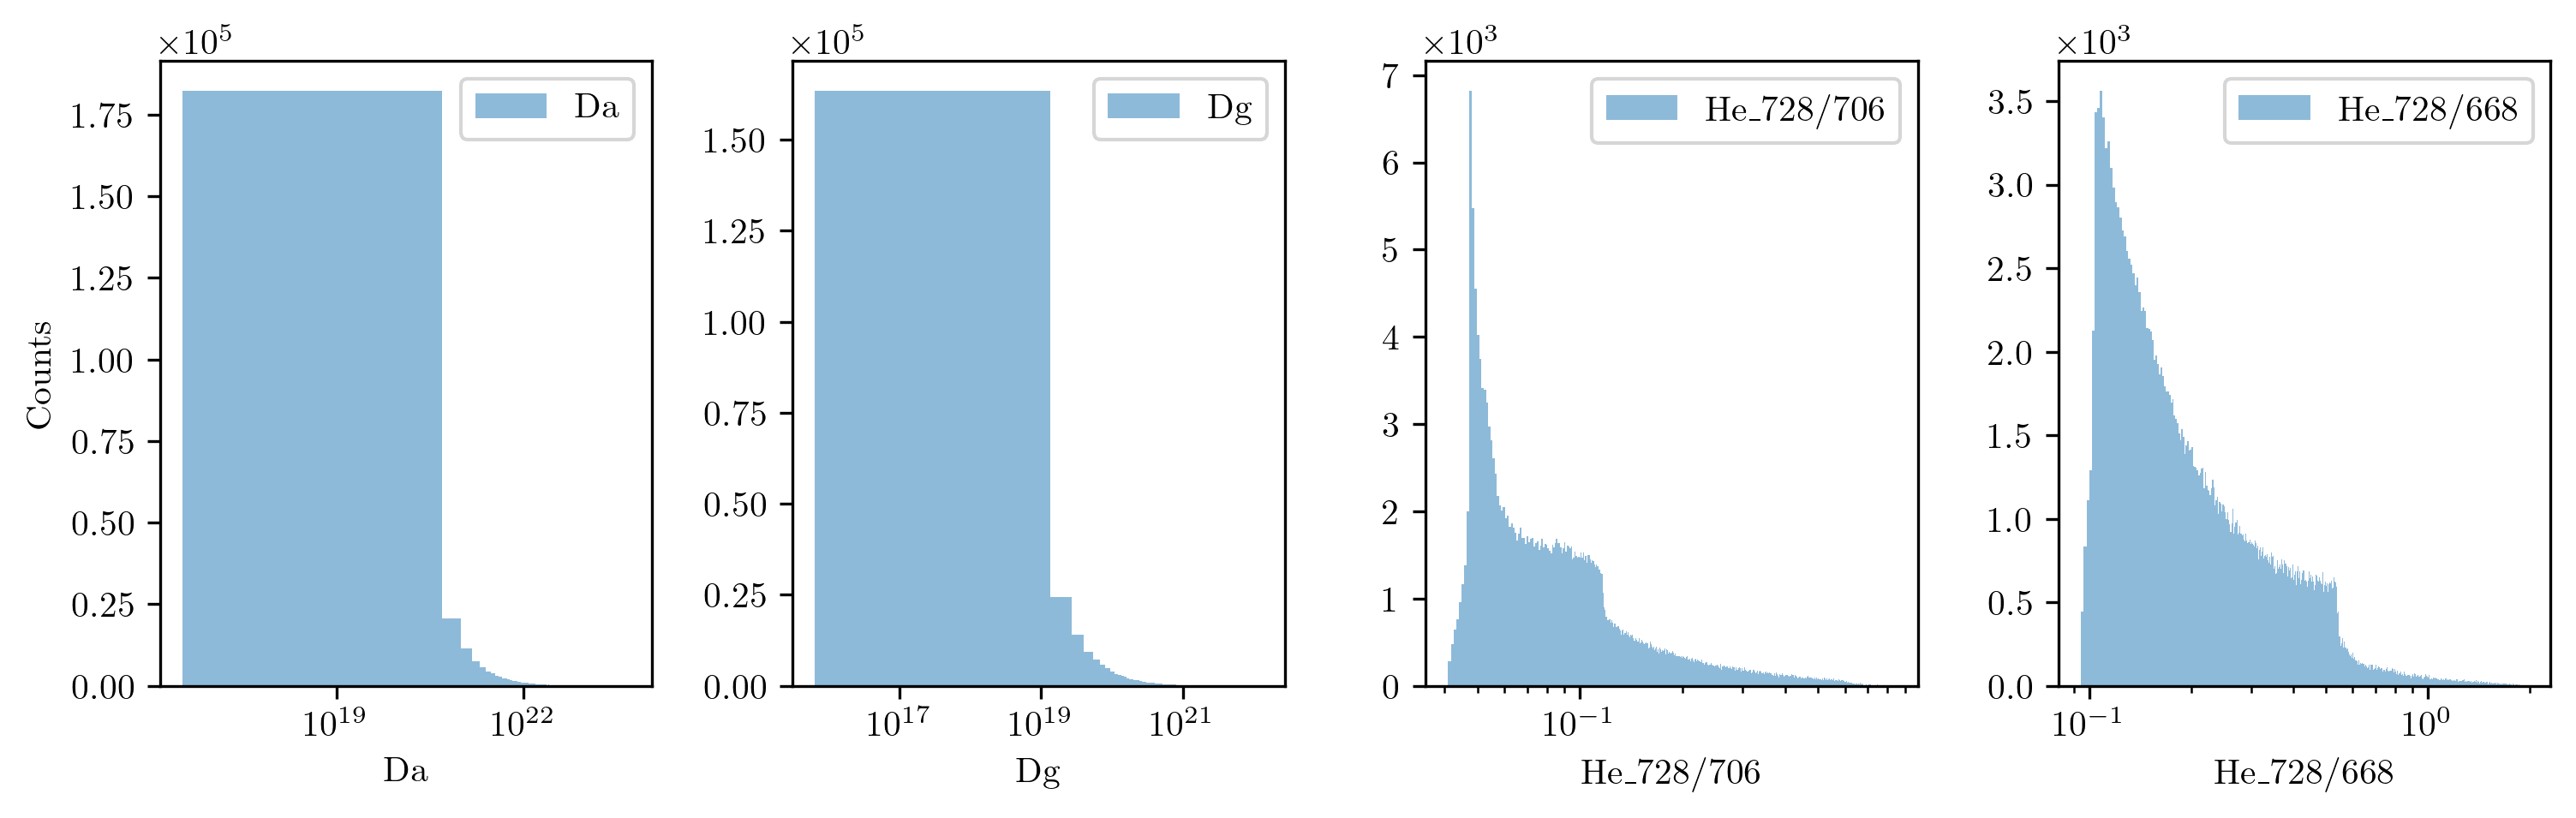

In [55]:
fig, axs = plt.subplots(1, 4, figsize=(10, 3), dpi = 300, gridspec_kw={'height_ratios': [1]})
fig.tight_layout()

# make y axis ticks in scientfic notation
for ax in axs:
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

axs[0].hist(X_no_process[:, 0], bins=1000, alpha=0.5, label='Da')
axs[0].set_xlabel('Da')
axs[0].set_ylabel('Counts')
axs[0].legend()
# set x axis to log
axs[0].set_xscale('log')

axs[1].hist(X_no_process[:, 1], bins=1000, alpha=0.5, label='Dg')
axs[1].set_xlabel('Dg')
axs[1].legend()
# set x axis to log
axs[1].set_xscale('log')

axs[2].hist(X_no_process[:, 2], bins=1000, alpha=0.5, label='He_728/706')
axs[2].set_xlabel('He_728/706')
axs[2].legend()
axs[2].set_xscale('log')

axs[3].hist(X_no_process[:, 3], bins=1000, alpha=0.5, label='He_728/668')
axs[3].set_xlabel('He_728/668')
axs[3].legend()
axs[3].set_xscale('log')

fig.subplots_adjust(hspace=0.03)
plt.show()

# Try crazy network in test set 

In [78]:
import models
model_path = 'models_v2/experiments_8/zesty-blaze-15'
model_ensemble = models.BNN_crazy_ensemble_DNN(model_path=model_path)

### config parameters ###
{'batch_size': 20000, 'epochs': 80, 'dataset': 'raw_datasets/dataset_exp_master_', 'inputs_labels': ['emi_3-2', 'emi_5-2', '728/706', '728/668'], 'inputs_prepro': [3, 3, 3, 3], 'inputs_scaler': 'StandardScaler', 'outputs_labels': ['Te', 'ne', 'no', 'Irate', 'Rrate', 'Brec3/B3'], 'outputs_prepro': [3, 3, 3, 3, 3, 1], 'outputs_scaler': 'MinMaxScaler', 'min_max_scale': (0, 10), 'model': 'MLP_BNN_model_Denseflipout_multi_output', 'last_bayes_layer': 100, 'l2_regularizer': 1e-08, 'gau_noise': [0.02, 0.02, 0.02, 0.02], 'num_nodes': 100, 'num_layers': 5, 'optimizer': 'adam', 'activation_fn': 'relu', 'loss_fn': 'mse', 'earlystopping_patience': 4, 'rec3_class': 0.97, 'inputs_mean_params': [10052082.197509686, 3244978.4719866547, 0.5091241580160363, 0.6577705424868243], 'inputs_scale_params': [11488025.276958555, 3168089.0004733037, 0.13198925203623493, 0.15184615433269585], 'outputs_min_params': [0.5848047407502157, 1000000.1276758848, 100000.05679203164, 105996.199912

In [79]:
num_networks = 6
model_ready = model_ensemble.ensemble_DNN_single_input(num_networks=num_networks)

[3, 3, 3, 3, 3, 1, 1]
[3, 3, 3, 3, 3, 1, 1]
[3, 3, 3, 3, 3, 1, 1]
[3, 3, 3, 3, 3, 1, 1]
[3, 3, 3, 3, 3, 1, 1]
[3, 3, 3, 3, 3, 1, 1]
Model: "model_29"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 4)]          0           []                               
                                                                                                  
 pre_processing_layer_11 (Pre_p  (None, 4)           0           ['input[0][0]']                  
 rocessingLayer)                                                                                  
                                                                                                  
 dense_534 (Dense)              (None, 100)          500         ['pre_processing_layer_11[0][0]']
                                                          

In [80]:
import numpy as np 

X_test, y_test = model_ensemble.load_test_set()
# for now make separation of data set (class) here
y_test_class = y_test[:, -1].copy()
y_test_class[y_test[:, -1] < model_ensemble.config_params['rec3_class']] = 1.0
y_test_class[y_test[:, -1] >= model_ensemble.config_params['rec3_class']] = 0.0

outputs_labels = model_ensemble.config_params['outputs_labels'][:-1]
print(outputs_labels)

# #predictions_raw = model_ready([X_test]*num_networks)
predictions_raw = model_ready(X_test)
# remeber that output shape now is (..., 7, num_networks)
predictions_raw = np.reshape(predictions_raw, (y_test.shape[0], y_test.shape[1] + 1, num_networks), order='F')

y_predict_realspace = np.mean(predictions_raw.copy(), axis = 2)
y_predict_std_realspace = (100*np.std(predictions_raw.copy(), axis = 2, dtype = np.float64))/y_predict_realspace

# not taking into account values that do not matter 
# since they were classified as recombination dominant 
mask_nan = np.ones_like(y_predict_realspace[:, -1])
mask_nan[y_predict_realspace[:, -1] < 0.5] = np.nan

#y_predict_realspace[:, 0] = y_predict_realspace[:, 0] * mask_nan
# y_predict_realspace[:, 0] = y_predict_realspace[:, 0] * mask_nan
# y_predict_realspace[:, 1] = y_predict_realspace[:, 1] * mask_nan
# y_predict_realspace[:, 4] = y_predict_realspace[:, 4] * mask_nan

y_predict_realspace[:, 2] = y_predict_realspace[:, 2] * mask_nan
y_predict_realspace[:, 3] = y_predict_realspace[:, 3] * mask_nan
y_predict_realspace[:, 4] = y_predict_realspace[:, 4] * mask_nan

y_class_predict = np.ones_like(y_test[:, -1])
y_class_predict[y_predict_realspace[:, -1] < 0.5] = 0


 


Getting data from folder:  raw_datasets/dataset_exp_master_
----PARQUET FILES FOUND-----
['Te', 'ne', 'no', 'Irate', 'Rrate']


  Te: 0.999315 //   ne: 0.998344 //   no: 0.992722 //   Irate: 0.997526 //   Rrate: 0.980841 // 

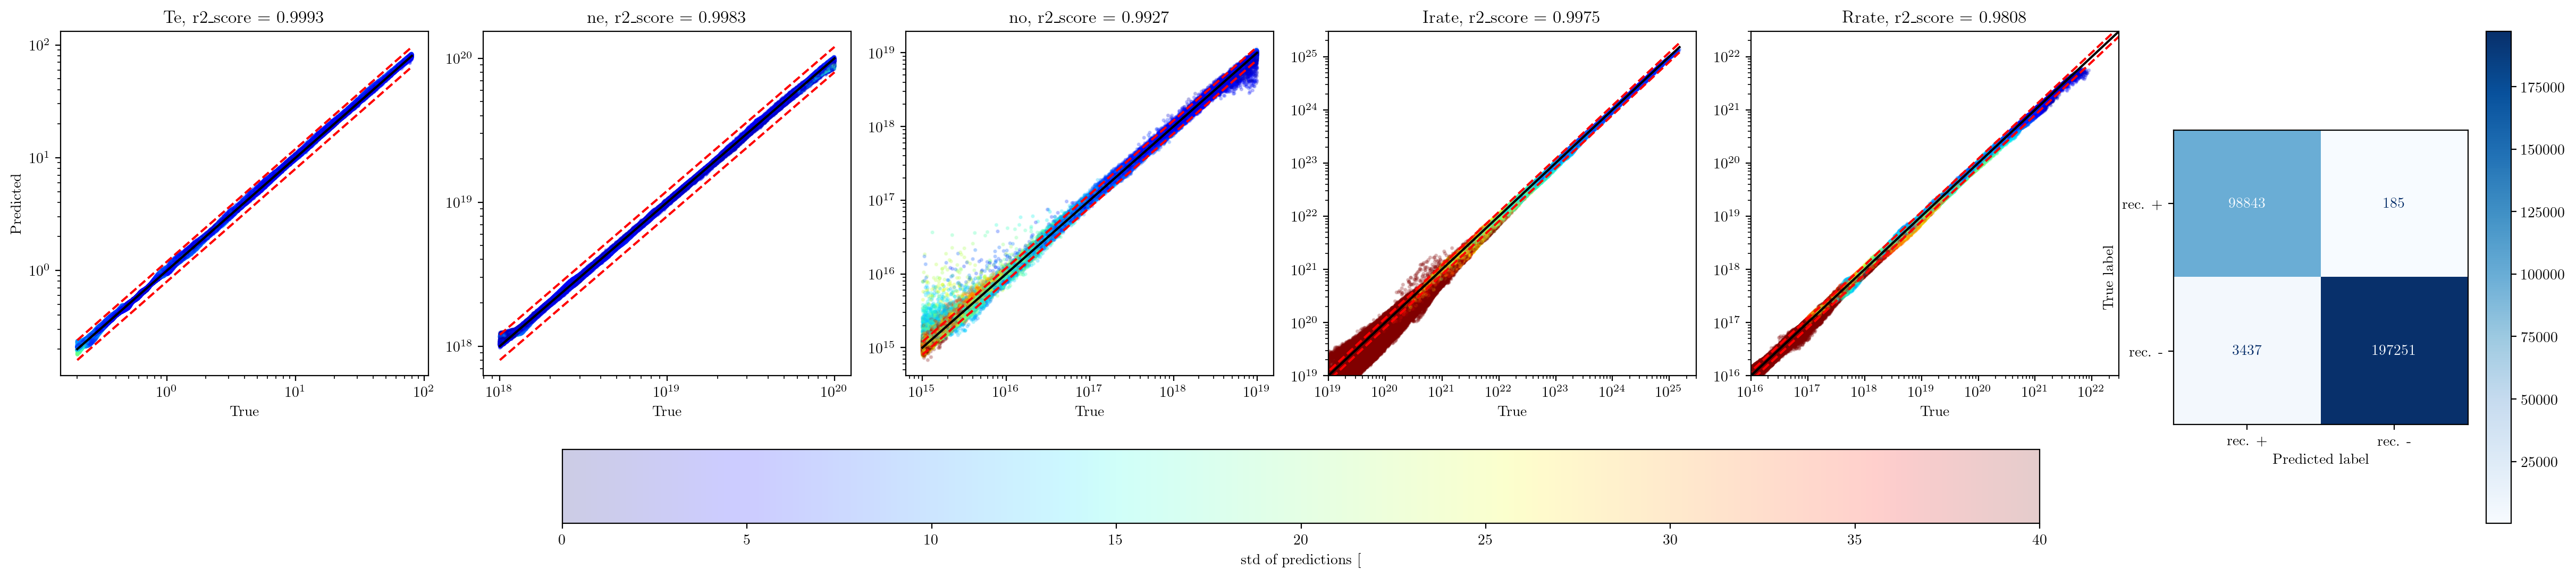

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score as r2_score_metric

fig, ax = plt.subplots(1, y_test.shape[1], figsize = (4*y_test.shape[1], 5.20), dpi = 200) 
fig.tight_layout()

for i in range(y_test.shape[1] - 1):

    print("  " + outputs_labels[i], end= ": ")
    # if i == 0 or i == 1 or i == 4:
    # if i == 1 or i == 4:
    #     r2_score = r2_score_metric(y_test[:,i], y_predict_realspace[:,i])
    # else:
    y_true_for_r2 = y_test[:,i].copy()
    y_pred_for_r2 = y_predict_realspace[:,i].copy()

    non_nan_indices = ~np.isnan(y_pred_for_r2)

    y_true_no_nan = y_true_for_r2[non_nan_indices]
    y_pred_no_nan = y_pred_for_r2[non_nan_indices]

    r2_score = r2_score_metric(y_true_no_nan, y_pred_no_nan)
    print('{:.6f}'.format(r2_score), end = ' // ')

    error_line_arr = np.linspace(np.min(y_test[:,i]), np.max(y_test[:,i]), 100)
        
    ax[i].plot(error_line_arr, error_line_arr, 'k-')
    ax[i].plot(error_line_arr, error_line_arr*1.2, 'r--')
    ax[i].plot(error_line_arr, error_line_arr*0.8, 'r--')
    # figure out error bars
    # ax.errorbar(y_test, mean, yerr=np.std(predictions, axis=1), fmt='o', alpha = 0.1)

    #ax[i].plot(y_test_truth_realspace[:,i], y_predict_realspace[:,i], 'o', alpha = 0.05, markersize=2)
    pcm = ax[i].scatter(y_test[:,i], y_predict_realspace[:,i], \
        c = y_predict_std_realspace[:,i], cmap = 'jet', alpha = 0.2, s = 3, \
            vmin = 0.0, vmax = 40.0)
    
    ax[i].set_title('{}, r2_score = {:.4f}'.format(outputs_labels[i], r2_score))

    ax[i].set_xlabel('True')
    if i == 0:
        ax[i].set_ylabel('Predicted')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')

    if i == 3:

        ax[i].set_xlim(1e19, 3e25)
        ax[i].set_ylim(1e19, 3e25)

    if i == 4:

        ax[i].set_xlim(1e16, 3e22)
        ax[i].set_ylim(1e16, 3e22)

    if i + 1 == y_test.shape[1] - 1:
        # add color bar
        cbar = fig.colorbar(pcm, ax = ax, orientation = 'horizontal', location = 'bottom')
        cbar.set_label('std of predictions [%]')

cm = confusion_matrix(y_test_class, y_class_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['rec. +', 'rec. -'])
disp.plot(ax = ax[5], cmap = 'Blues', values_format = 'd')


In [63]:
!scp -r models_v2/experiments_8/treasured-frog-11_ensemble_DNN_6 mantis5:/home/caballero/data_test/models_matlab/

/etc/profile.d/lang.sh: line 19: warning: setlocale: LC_CTYPE: cannot change locale (UTF-8): No such file or directory
caballero@lac1.epfl.ch's password: 


# speed comparison



In [33]:
def test_fn():
    for i in range(num_networks):
        model_ensemble.model_bnn(X_test[:14559, :])

In [34]:
%timeit test_fn()

106 ms ± 2.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [35]:
%timeit model_ready(X_test[:14559, :])

21.8 ms ± 734 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
print(((0.6*4)*22)/106)

0.4981132075471698


In [24]:
i_min = 6508

i_max = i_min + 3

input = X_test[i_min:i_max, :].copy()
y_test_here = y_test[i_min:i_max, :].copy()
result_full = model_ready(input)
result_full = np.reshape(result_full, \
    (input.shape[0], y_test.shape[1]  + 1, num_networks), \
        order='F')

result_mean = np.mean(result_full.copy(), axis = 2)
result_std = (100*np.std(result_full.copy(), axis = 2, dtype = np.float64))/result_mean

print(y_test_here)
print(result_mean)
print(result_std)
 

[[2.44280233e+01 1.64724409e+19 1.09459085e+18 4.02283050e+23
  7.27985050e+18 1.40213322e-05]
 [6.21536662e+00 6.69660116e+18 5.42873508e+16 1.03544513e+21
  4.50738348e+18 2.01678538e-03]
 [2.35752238e-01 1.84426768e+19 2.40977292e+15 3.50613564e-04
  9.26197855e+21 1.00000000e+00]]
[[2.42357254e+01 1.62995639e+19 1.10575101e+18 4.19370982e+23
  8.73465341e+18 1.34544625e-05 9.99986529e-01]
 [6.34906626e+00 6.67950840e+18 5.17866584e+16 1.10726310e+21
  4.52742494e+18 9.54585616e-03 9.90454137e-01]
 [2.20098302e-01 1.87358057e+19 1.11078600e+17 5.89103707e+18
  9.46667901e+21 9.98633504e-01 1.36653148e-03]]
[[2.34530094e+00 3.05606312e+00 2.98723156e+00 5.74092306e+00
  5.31563559e+01 1.14532695e+01 1.51964670e-04]
 [4.00901634e+00 9.17606127e-01 7.25019403e+00 1.68521136e+01
  3.66777724e+01 6.62769403e+00 6.38774762e-02]
 [1.09461896e+02 5.48885091e+00 1.20394987e+01 1.03943352e+02
  7.16089999e+00 3.57934281e-02 2.61560499e+01]]


# Try on experimental data 

In [25]:
# extract data from shot 
# assign a variable data from .mat file 
import scipy.io as io
data = io.loadmat('exp_data_mantis/sh78224.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Da_emi', 'Da_time', 'Db_emi', 'Db_time', 'Dg_emi', 'Dg_time', 'He667_emi', 'He667_time', 'He706_emi', 'He706_time', 'He728_emi', 'He728_time', 'shot'])


In [26]:
# shapes of arrays 
print(data['Da_emi'][:, 0].shape)
print(data['Dg_emi'][:, 0])
print(data['He728_emi'][:, 0]/data['He706_emi'][:, 0])
print(data['He728_emi'][:, 0]/data['He667_emi'][:, 0])


(39652,)
[1.66373144e+17 0.00000000e+00 0.00000000e+00 ... 4.22090379e+16
 0.00000000e+00 0.00000000e+00]
[1.9456543         nan        nan ... 0.95610248        nan        nan]
[1.90142137        nan        nan ... 1.29186789        nan        nan]


/var/folders/_3/3757q02j3rb_45jnmmvqcc700000gn/T/ipykernel_24746/4063657697.py:4: RuntimeWarning: divide by zero encountered in divide
  print(data['He728_emi'][:, 0]/data['He706_emi'][:, 0])
/var/folders/_3/3757q02j3rb_45jnmmvqcc700000gn/T/ipykernel_24746/4063657697.py:4: RuntimeWarning: invalid value encountered in divide
  print(data['He728_emi'][:, 0]/data['He706_emi'][:, 0])
/var/folders/_3/3757q02j3rb_45jnmmvqcc700000gn/T/ipykernel_24746/4063657697.py:5: RuntimeWarning: divide by zero encountered in divide
  print(data['He728_emi'][:, 0]/data['He667_emi'][:, 0])
/var/folders/_3/3757q02j3rb_45jnmmvqcc700000gn/T/ipykernel_24746/4063657697.py:5: RuntimeWarning: invalid value encountered in divide
  print(data['He728_emi'][:, 0]/data['He667_emi'][:, 0])


<!-- Da = 3.8193E+16 to 2.6139E+23
Dg = 7.9931E+15 to 7.3834E+21
He_706 = 4.2904E-02 to 7.3600E-01
He_668 = 9.6133E-02 to 1.9680E+00
---------
Te = 0.20078203727878147 to 79.21693276366162
ne = 1.0011E+18 to 9.9854E+19
no = 1.0046E+15 to 9.9624E+18
Irate = 7.6233E-09 to 5.9343E+24
Rrate = 1.3300E+16 to 7.8052E+23 -->

In [27]:
# Da = 3.8193E+16 to 2.6139E+23
# Dg = 7.9931E+15 to 7.3834E+21
# He_706 = 4.2904E-02 to 7.3600E-01
# He_668 = 9.6133E-02 to 1.9680E+00
# ---------
# Te = 0.20078203727878147 to 79.21693276366162
# ne = 1.0011E+18 to 9.9854E+19
# no = 1.0046E+15 to 9.9624E+18
# Irate = 7.6233E-09 to 5.9343E+24
# Rrate = 1.3300E+16 to 7.8052E+23

cell_number = 26958 - 1
time_step = 123

input = np.array([data['Da_emi'][cell_number, time_step], data['Dg_emi'][cell_number, time_step], \
    data['He728_emi'][cell_number, time_step]/data['He706_emi'][cell_number, time_step], \
    data['He728_emi'][cell_number, time_step]/data['He667_emi'][cell_number, time_step]])
print(input)
print(data['He706_emi'][cell_number, time_step])
output = model_ready(input.reshape(1,4))

output = np.reshape(output, (1, 7, num_networks), order='F')
print(output)
output_mean = np.mean(output, axis = 2)
output_std = (100*np.std(output, axis = 2, dtype = np.float64))/output_mean
print(output_mean)
print(output_std)

import tensorflow as tf
inputs_tf = (tf.pow(input, 1/tf.constant(model_ensemble.config_params['inputs_prepro'], dtype=tf.float32)) - model_ensemble.config_params['inputs_mean_params'])/ \
    model_ensemble.config_params['inputs_scale_params'] 
print( (tf.pow(input, 1/tf.constant(model_ensemble.config_params['inputs_prepro'], dtype=tf.float32)) - model_ensemble.config_params['inputs_mean_params'])/ \
    model_ensemble.config_params['inputs_scale_params'] )

model_ensemble.model_bnn(inputs_tf.numpy().reshape(1,4))


[5.15789787e+18 1.55522395e+17 7.92064334e-01 1.71317711e-01]
8.497375424799786e+16
[[[ 8.20914536e+01  7.95218658e+01  7.64055252e+01  7.49937439e+01]
  [ 1.40331230e+19  1.46569562e+19  1.25087886e+19  1.37343978e+19]
  [ 2.29530665e+13  2.73946100e+13  3.07361617e+14  8.73196178e+14]
  [ 6.70434832e+20  1.27544558e+19  9.59667119e+20  2.12226207e+21]
  [ 3.98730367e+17  4.96276558e+18 -2.89148043e+15 -1.07051287e+16]
  [ 1.37900615e-08  1.76199038e-08  1.28140210e-08  2.04869846e-08]
  [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]]]
[[7.8253143e+01 1.3733316e+19 3.0772635e+14 9.4127963e+20 1.3369747e+18
  1.6177742e-08 1.0000000e+00]]
[[  3.52175925   5.68995284 112.50492252  81.09288504 157.06277673
   18.96799018   0.        ]]
tf.Tensor([-0.724606   -0.85452366  4.520483   -0.6072143 ], shape=(4,), dtype=float32)


<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[ 9.5716639e+00,  3.9419785e+00, -4.5909321e-01,  3.7648728e-01,
        -6.4989805e-02,  2.3609537e-08,  1.0000000e+00]], dtype=float32)>

In [51]:
0.8 + 0.8*0.01

0.808

In [28]:
output = model_ready(np.array([np.nan,np.nan,np.nan,np.nan]).reshape(1,4))
print(output)
output = np.reshape(output, (1, 7, num_networks), order='F')
output_mean = np.mean(output, axis = 2)
output_std = (100*np.std(output, axis = 2, dtype = np.float64))/output_mean
print(output_mean)
print(output_std)


tf.Tensor(
[[1.24077921e+01 2.48543504e+18 4.43250967e+17 1.08277130e+22
  7.27089774e+16 1.18654838e-03 9.98813510e-01 1.30816593e+01
  2.53645733e+18 4.34005037e+17 1.19357066e+22 2.76014914e+16
  1.13498536e-03 9.98865008e-01 1.28601885e+01 2.50369683e+18
  4.14258632e+17 1.09803084e+22 1.89875556e+17 1.45739818e-03
  9.98542666e-01 1.21349735e+01 2.52018950e+18 4.20804437e+17
  1.40553302e+22 2.12968822e+17 1.35856518e-03 9.98641431e-01]], shape=(1, 28), dtype=float32)
[[1.2621153e+01 2.5114445e+18 4.2807977e+17 1.1949765e+22 1.2578872e+17
  1.2843744e-03 9.9871564e-01]]
[[2.94093316e+00 7.55130007e-01 2.63573398e+00 1.07757530e+01
  6.17913751e+01 1.01013142e+01 1.29893669e-02]]


In [29]:
def test_exp_data_bnn(model, data = 'exp_data_mantis/sh78224.mat'):

    # this function is taylor for data from shot 78224
    import scipy.io as io
    data = io.loadmat('exp_data_mantis/sh78224.mat')
    print('succesfully loaded data from shot 78224')

    # here I will take into account the missing time at Da_emi
    cells_num_per_shot = data['Da_emi'].shape[0]
    time_steps = data['Da_emi'].shape[1]
    channels_num = 4
    data_emis = np.zeros((cells_num_per_shot, time_steps, channels_num))

    Da_arr = data['Da_emi']
    # make values equal to zero nan
    # Da_arr[Da_arr == 0.0] = np.nan

    # index of missing time step
    idx_missing = 5

    Dg_arr = data['Dg_emi']
    Dg_arr = np.delete(Dg_arr, idx_missing, axis = 1)
    # Dg_arr[Dg_arr == 0.0] = np.nan
    

    He706_arr = data['He706_emi']
    He706_arr = np.delete(He706_arr, idx_missing, axis = 1)
    # He706_arr[He706_arr == 0.0] = np.nan

    He728_arr = data['He728_emi']
    He728_arr = np.delete(He728_arr, idx_missing, axis = 1)
    # He728_arr[He728_arr == 0.0] = np.nan

    He667_arr = data['He667_emi']
    He667_arr = np.delete(He667_arr, idx_missing, axis = 1)
    # He667_arr[He667_arr == 0.0] = np.nan

    Ratio_728_706 = np.nan_to_num(He728_arr/He706_arr, nan = 0.0, posinf = 0.0, neginf = 0.0)

    Ratio_728_668 = np.nan_to_num(He728_arr/He667_arr, nan = 0.0, posinf = 0.0, neginf = 0.0)

    # Ratio_728_706 = He728_arr/He706_arr
    # Ratio_728_668 = He728_arr/He667_arr

    # oder and He ratios ['emi_3-2', 'emi_5-2', '728/706', '728/668']

    # Dalpha
    data_emis[:, :, 0] = Da_arr
    data_emis[:, :, 1] = Dg_arr
    data_emis[:, :, 2] = Ratio_728_706
    data_emis[:, :, 3] = Ratio_728_668

    # make values equal to zero into nan
    data_emis[data_emis == 0.0] = np.nan

    # create array to store results
    # for now lets hard code it 
    # output array 
    # ['Te', 'ne', 'no', 'Irate', 'Rrate', 'Brec3/B3']
    outputs_mean_network = np.zeros((cells_num_per_shot, time_steps, 6))
    outputs_std_network = np.zeros((cells_num_per_shot, time_steps, 6))

    # go through all cells at each time step 

    for idx in range(time_steps):

        # extract input data
        input = data_emis[:, idx, :].copy()

        # predict output
        result_full = model_ready(input)

        # that seven is because I know that I have 7 outputs
        result_full = np.reshape(result_full, \
            (input.shape[0], 7, num_networks), \
                order='F')

        result_mean = np.mean(result_full.copy(), axis = 2)
        result_std = (100*np.std(result_full.copy(), axis = 2, dtype = np.float64))/result_mean

        # use classification output to put nan into no and Irate 

        # not taking into account values that do not matter 
        # since they were classified as recombination dominant 
        mask_nan = np.ones_like(result_mean[:, -1])
        mask_nan[result_mean[:, -1] < 0.5] = np.nan

        # put nan no and Irate when they are classified as recombination dominant
        #result_mean[:, 0] = result_mean[:, 0] * mask_nan
        result_mean[:, 2] = result_mean[:, 2] * mask_nan
        result_mean[:, 3] = result_mean[:, 3] #* mask_nan

        #result_std[:, 0] = result_std[:, 0] * mask_nan
        result_std[:, 2] = result_std[:, 2] * mask_nan
        result_std[:, 3] = result_std[:, 3] #* mask_nan

        # regression outputs
        outputs_mean_network[:, idx, :-1] = result_mean[:, :-2]
        outputs_std_network[:, idx, :-1] = result_std[:, :-2]

        # classification outputs
        outputs_mean_network[:, idx, -1] = mask_nan
        outputs_std_network[:, idx, -1] = result_std[:, -2]

        # make values of outputs equal to nan where, Dalpha is 0.0
        # mask_Da = np.ones_like(Da_arr)
        #outputs_mean_network[:, idx, :] = Da_arr[:, idx]

    mask_Da = np.ones_like(Da_arr)
    mask_Da[Da_arr == 0.0] = np.nan

    mask_Dg = np.ones_like(Dg_arr)
    mask_Da[Dg_arr == 0.0] = np.nan

    mask_Ratio_728_706 = np.ones_like(Ratio_728_706)
    mask_Ratio_728_706[Ratio_728_706 == 0.0] = np.nan

    #mask_Ratio_728_706[Ratio_728_706 > 0.70] = np.nan

    mask_Ratio_728_668 = np.ones_like(Ratio_728_668)
    mask_Ratio_728_668[Ratio_728_668 == 0.0] = np.nan

    outputs_mean_network[:, :, 0] = outputs_mean_network[:, :, 0] * mask_Da * mask_Dg * mask_Ratio_728_706 * mask_Ratio_728_668
    outputs_mean_network[:, :, 1] = outputs_mean_network[:, :, 1] * mask_Da * mask_Dg * mask_Ratio_728_706 * mask_Ratio_728_668
    outputs_mean_network[:, :, 2] = outputs_mean_network[:, :, 2] * mask_Da * mask_Dg * mask_Ratio_728_706 * mask_Ratio_728_668
    outputs_mean_network[:, :, 3] = outputs_mean_network[:, :, 3] * mask_Da * mask_Dg * mask_Ratio_728_706 * mask_Ratio_728_668
    outputs_mean_network[:, :, 4] = outputs_mean_network[:, :, 4] * mask_Da * mask_Dg * mask_Ratio_728_706 * mask_Ratio_728_668
    outputs_mean_network[:, :, 5] = outputs_mean_network[:, :, 5] * mask_Da * mask_Dg * mask_Ratio_728_706 * mask_Ratio_728_668

    outputs_std_network[:, :, 0] = outputs_std_network[:, :, 0] * mask_Da * mask_Dg * mask_Ratio_728_706 * mask_Ratio_728_668
    outputs_std_network[:, :, 1] = outputs_std_network[:, :, 1] * mask_Da * mask_Dg * mask_Ratio_728_706 * mask_Ratio_728_668
    outputs_std_network[:, :, 2] = outputs_std_network[:, :, 2] * mask_Da * mask_Dg * mask_Ratio_728_706 * mask_Ratio_728_668
    outputs_std_network[:, :, 3] = outputs_std_network[:, :, 3] * mask_Da * mask_Dg * mask_Ratio_728_706 * mask_Ratio_728_668
    outputs_std_network[:, :, 4] = outputs_std_network[:, :, 4] * mask_Da * mask_Dg * mask_Ratio_728_706 * mask_Ratio_728_668
    outputs_std_network[:, :, 5] = outputs_std_network[:, :, 5] * mask_Da * mask_Dg * mask_Ratio_728_706 * mask_Ratio_728_668

    # outputs_mean_network = np.nan_to_num(outputs_mean_network, nan = 0.0, posinf = 0.0, neginf = 0.0)
    # outputs_std_network = np.nan_to_num(outputs_std_network, nan = 0.0, posinf = 0.0, neginf = 0.0)
    return outputs_mean_network, outputs_std_network


    

In [30]:
outputs_mean_network, outputs_std_network = test_exp_data_bnn(model_ready)

succesfully loaded data from shot 78224


/var/folders/_3/3757q02j3rb_45jnmmvqcc700000gn/T/ipykernel_24746/1550241507.py:38: RuntimeWarning: divide by zero encountered in divide
  Ratio_728_706 = np.nan_to_num(He728_arr/He706_arr, nan = 0.0, posinf = 0.0, neginf = 0.0)
/var/folders/_3/3757q02j3rb_45jnmmvqcc700000gn/T/ipykernel_24746/1550241507.py:38: RuntimeWarning: invalid value encountered in divide
  Ratio_728_706 = np.nan_to_num(He728_arr/He706_arr, nan = 0.0, posinf = 0.0, neginf = 0.0)
/var/folders/_3/3757q02j3rb_45jnmmvqcc700000gn/T/ipykernel_24746/1550241507.py:40: RuntimeWarning: divide by zero encountered in divide
  Ratio_728_668 = np.nan_to_num(He728_arr/He667_arr, nan = 0.0, posinf = 0.0, neginf = 0.0)
/var/folders/_3/3757q02j3rb_45jnmmvqcc700000gn/T/ipykernel_24746/1550241507.py:40: RuntimeWarning: invalid value encountered in divide
  Ratio_728_668 = np.nan_to_num(He728_arr/He667_arr, nan = 0.0, posinf = 0.0, neginf = 0.0)
/Users/jaimecaballero/miniforge3/envs/epfl2/lib/python3.8/site-packages/numpy/core/_method

In [32]:
print(outputs_std_network[:,:, 0])

[[ 0.          0.          0.         ...  0.          0.
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 ...
 [ 0.                 nan         nan ... 13.66625507 44.4950233
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]]


In [33]:
print(outputs_std_network[:,:, 0])

[[ 0.          0.          0.         ...  0.          0.
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 ...
 [ 0.                 nan         nan ... 13.66625507 44.4950233
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]]


In [34]:
print(outputs_mean_network[:,:, 0])

[[ 1.21712708  1.21712708  1.21712708 ...  1.21712708  1.21712708
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 ...
 [ 1.21712708         nan         nan ... 27.06247139  2.34504485
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]]


In [35]:
print(outputs_mean_network[:,:, 0])

[[ 1.21712708  1.21712708  1.21712708 ...  1.21712708  1.21712708
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 ...
 [ 1.21712708         nan         nan ... 27.06247139  2.34504485
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]]


In [36]:
# save data for exporting in matlab format
import scipy.io as io
io.savemat('exp_data_mantis/outputs_network_6_num_1_dnn_4.mat', \
    {'Te_mean': outputs_mean_network[:, :, 0], \
        'ne_mean': outputs_mean_network[:, :, 1], \
            'no_mean': outputs_mean_network[:, :, 2], \
                'Irate_mean': outputs_mean_network[:, :, 3], \
                    'Rrate_mean': outputs_mean_network[:, :, 4], \
                        'rec_dom_mean': outputs_mean_network[:, :, 5],\
                            'Te_std': outputs_std_network[:, :, 0], \
                                'ne_std': outputs_std_network[:, :, 1], \
                                    'no_std': outputs_std_network[:, :, 2], \
                                        'Irate_std': outputs_std_network[:, :, 3], \
                                            'Rrate_std': outputs_std_network[:, :, 4], \
                                                'rec_dom_std': outputs_std_network[:, :, 5]})

In [161]:
x = io.loadmat('exp_data_mantis/outputs_mean_network.mat')
print(x.keys())
print(x['Te_mean'].shape)

dict_keys(['__header__', '__version__', '__globals__', 'Te_mean', 'ne_mean', 'no_mean', 'Irate_mean', 'Rrate_mean', 'rec_dom_mean'])
(39652, 400)


In [72]:
# clean data to visuzlize it here 
# mask mean values with std > 40

mask_std = np.ones_like(outputs_std_network[:, :, :])
mask_std[outputs_std_network[:, :, :] > 10] = 0.0

outputs_mean_network_here = outputs_mean_network.copy() * mask_std
# outputs_mean_network_here = np.nan_to_num(outputs_mean_network_here, nan = 0.0, posinf = 0.0, neginf = 0.0)
# make Irate sum plot 

Irate_sum = np.nansum(outputs_mean_network_here[:, :, 3], axis = 0)
Rrate_sum = np.nansum(outputs_mean_network_here[:, :, 4], axis = 0)




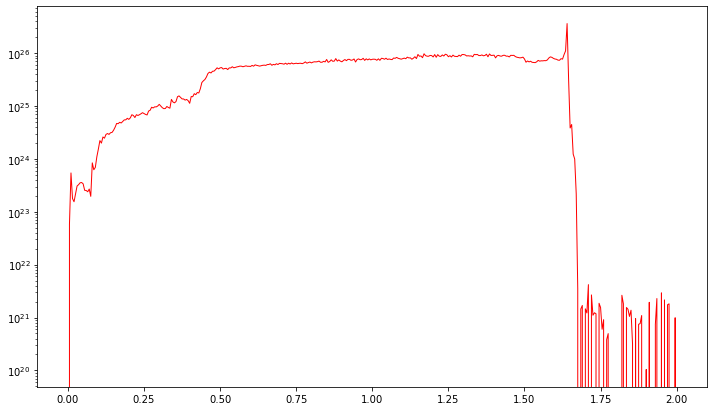

In [73]:
import matplotlib.pyplot as plt
time_arr = data['Da_time']

fig = plt.figure(figsize=(12, 7))
plt.plot(time_arr, Irate_sum, 'r-', linewidth = 1)
# plt.plot(time_arr, Rrate_sum, 'b-', linewidth = 1)
plt.yscale('log')

# Data compression analysis 

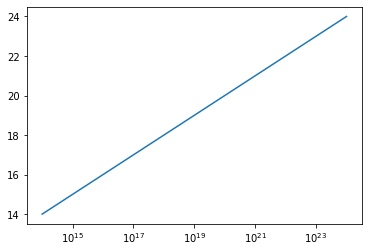

In [52]:
import matplotlib.pyplot as plt

x = np.geomspace(1e14, 1e24, 100)

y = lambda x: np.power(x, 1/7)

y = lambda x: np.log10(x)

plt.plot(x, y(x))
plt.xscale('log')
# plt.yscale('log')

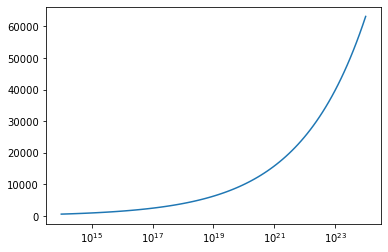

In [152]:
import matplotlib.pyplot as plt

x = np.geomspace(1e14, 1e24, 100)

y = lambda x: np.power(x, 1/5)

# y = lambda x: np.log(x)

plt.plot(x, y(x))
plt.xscale('log')
# plt.yscale('log')

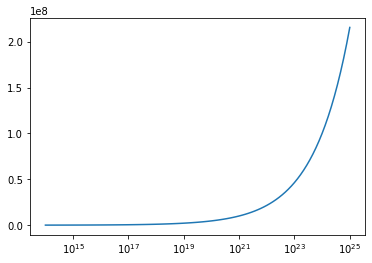

In [150]:
import matplotlib.pyplot as plt

x = np.geomspace(1e14, 1e25, 100)

# x = np.geomspace(1e18, 1e20, 100)

y = lambda x:  np.power(x, 1/3)



plt.plot(x, y(x))
plt.xscale('log')
# plt.yscale('log')

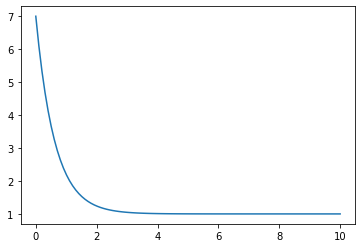

In [24]:
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)

y = lambda x:  6*np.power(np.ones_like(x)*0.2, x) + 1



plt.plot(x, y(x))
# plt.xscale('log')
# plt.yscale('log')

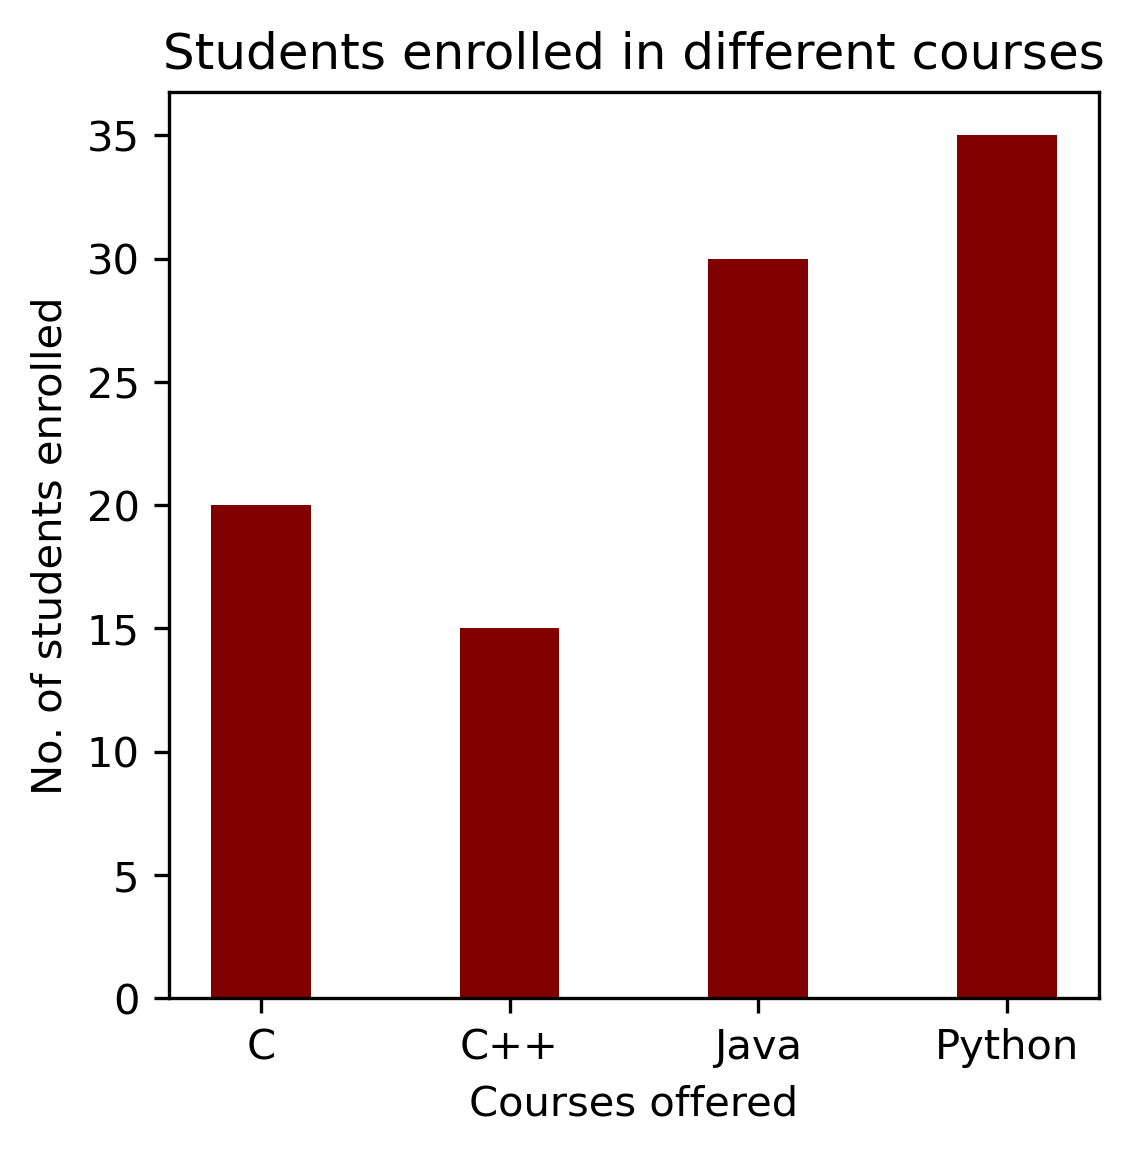

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# creating the dataset
data = {'C':20, 'C++':15, 'Java':30, 
        'Python':35}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize=(4, 4), dpi = 300)
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
# plt.title("Students enrolled in different courses")
plt.show()


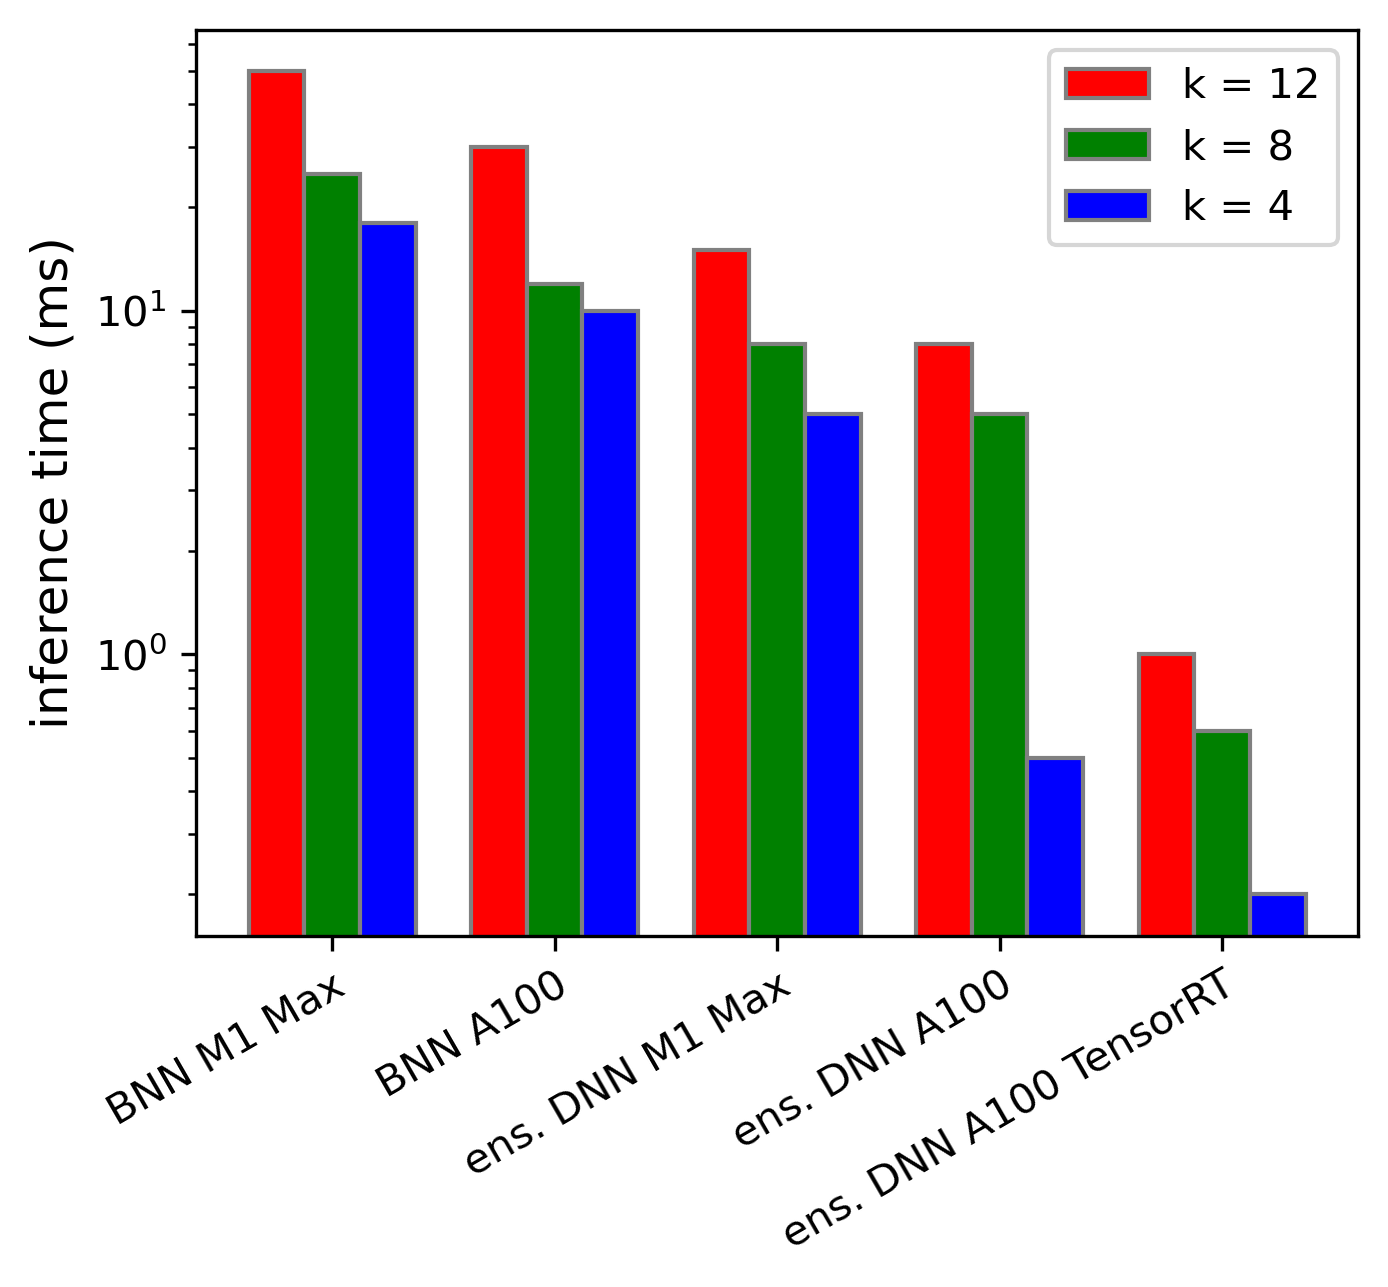

In [56]:

import numpy as np 
import matplotlib.pyplot as plt 
 
# set width of bar 
barWidth = 0.25
fig = plt.figure(figsize=(5, 4), dpi = 300)



# set height of bar 
IT = [50, 30, 15, 8, 1] 
ECE = [25, 12, 8, 5, 0.6] 
CSE = [18, 10, 5, 0.5, 0.2] 
 
# Set position of bar on X axis 
br1 = np.arange(len(IT)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth, 
        edgecolor ='grey', label ='k = 12') 
plt.bar(br2, ECE, color ='g', width = barWidth, 
        edgecolor ='grey', label ='k = 8') 
plt.bar(br3, CSE, color ='b', width = barWidth, 
        edgecolor ='grey', label ='k = 4') 
 
# Adding Xticks 
# plt.xlabel(' ', fontweight ='bold', fontsize = 15) 
plt.ylabel('inference time (ms)', fontsize = 12) 
plt.xticks([r + barWidth for r in range(len(IT))], 
        ['BNN M1 Max', 'BNN A100', 'ens. DNN M1 Max', 'ens. DNN A100', 'ens. DNN A100 TensorRT'], \
                rotation = 30, rotation_mode = 'anchor', ha = 'right')


plt.yscale('log')
 
plt.legend()
plt.show() 

In [58]:
# mean average loss


# Python program for calculating Mean Absolute 
# Error using sklearn 
  
# import the module 
from sklearn.metrics import mean_absolute_error as mae 
  
# list of integers of actual and calculated 
actual = [2, 3, 5, 5, 9] 
calculated = [3, 3, 8, 7, 6] 
  
# calculate MAE 
error = mae(actual, calculated) 

error_2 = 0
for i in range(5):
    error_2 = error_2 + mae(actual[i], calculated[i])
  
# display 
print("Mean absolute error : " + str(error))
print("Mean absolute error individual : " + str(error))


TypeError: Expected sequence or array-like, got <class 'int'>

TypeError: Expected sequence or array-like, got <class 'int'>

In [134]:
3e21/(2*50)

3e+19